### Empirical method for estimation of endmembers

**Authors :** *Idriss ABDOULWAHAB & Amrin AKTER*

This notebook is dedicated on the estimation of endmembers using the empirical method from : 
B. Luo et al. 2013

The dataset we will use is from the paper :
B. Koirala et al., "A Multisensor Hyperspectral Benchmark Dataset For Unmixing of Intimate Mixtures," in IEEE Sensors Journal, doi: 10.1109/JSEN.2023.3343552

#### 1.1 Data loading

In [1]:
import glob
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = loadmat('dataset/ASD_Spectroradiometer/ASD_Spectroradiometer_dataset.mat')
data_matrix = data['ASD_Spectroradiometer']

N_s = len(data_matrix[:,1][0]) # Numbers of bands
N_a = data_matrix.shape[1] # Numbers of samples

X = np.ones((N_s,N_a))

for i in range (N_a):
    for j in range (N_s):
        X[j,i]=data_matrix[:,i][0][j][0]

has_infinite = np.iscomplexobj(X)

if has_infinite:
    print("La matrice X contient des valeurs infinies !")

## It's important to center the data in order to compute covariance and correlation
mean = np.mean(X, axis=0)
std = np.std(X, axis=0, ddof=1)
X_centered = X-mean
X_normalized = X_centered/std

#### 1.2 Covariance and correlation

/home/idrissabd6/miniconda3/envs/perso_env/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/idrissabd6/miniconda3/envs/perso_env/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Eigen values $\\hat{\\lambda_i}$ of K')

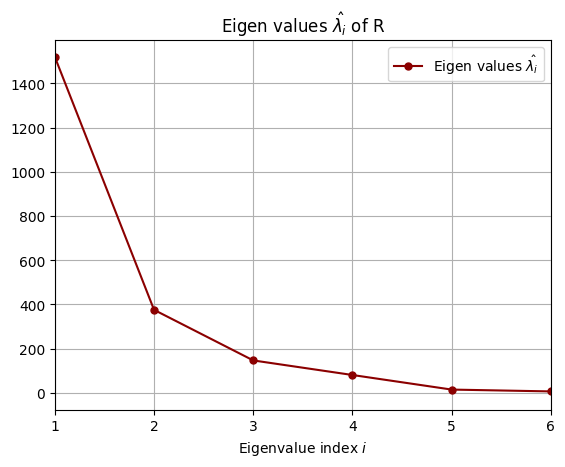

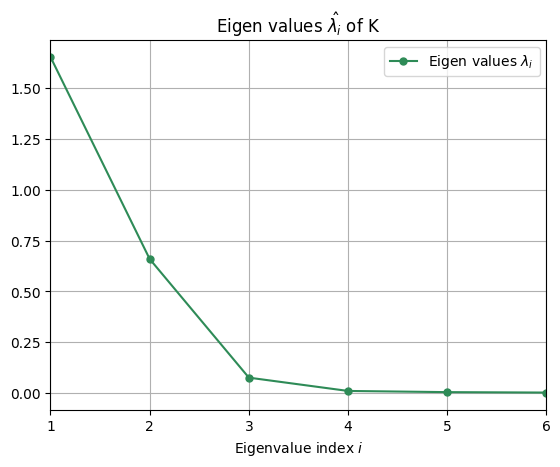

In [16]:
K = np.cov(X_centered, rowvar=True)
R = np.corrcoef(X_normalized, rowvar=True)

eig_vals_K, eig_vecs_K = np.linalg.eig(K) 
eig_vals_R, eig_vecs_R = np.linalg.eig(R) 

## Plot of eigen values
x_axis = np.linspace(1,N_s,N_s)
plt.figure(1)
plt.plot(x_axis,eig_vals_R,label='Eigen values $\hat{\lambda_i}$', marker='o', markersize=5, linestyle='-',color='darkred')
plt.grid()
plt.xlabel('Eigenvalue index $i$')
plt.legend()
plt.xlim([1,6])
plt.title("Eigen values $\hat{\lambda_i}$ of R")

plt.figure(2)
plt.plot(x_axis,eig_vals_K,label='Eigen values $\lambda_i$', marker='o', markersize=5, linestyle='-',color='seagreen')
plt.grid()
plt.legend()
plt.xlabel('Eigenvalue index $i$')
plt.xlim([1,6])
plt.title("Eigen values $\hat{\lambda_i}$ of K")

### 1.3 Likelihood function

In [21]:
eig_R = eig_vals_R.real
eig_K = eig_vals_K.real

Z = eig_R-eig_K

A = np.zeros(N_s)
B = np.zeros(N_s)
sigma = np.zeros(N_s)

for i in range (N_s):
    sigma[i] = (2/N_a)*(eig_R[i]**2 + eig_K[i]**2)

# Log-likelihood
for i in range (N_s):
    A[i] = -np.sum((Z[i:]**2)/(2*sigma[i:]))
    B[i] = -np.sum(np.log(np.sqrt(sigma[i:])))

H = A+B

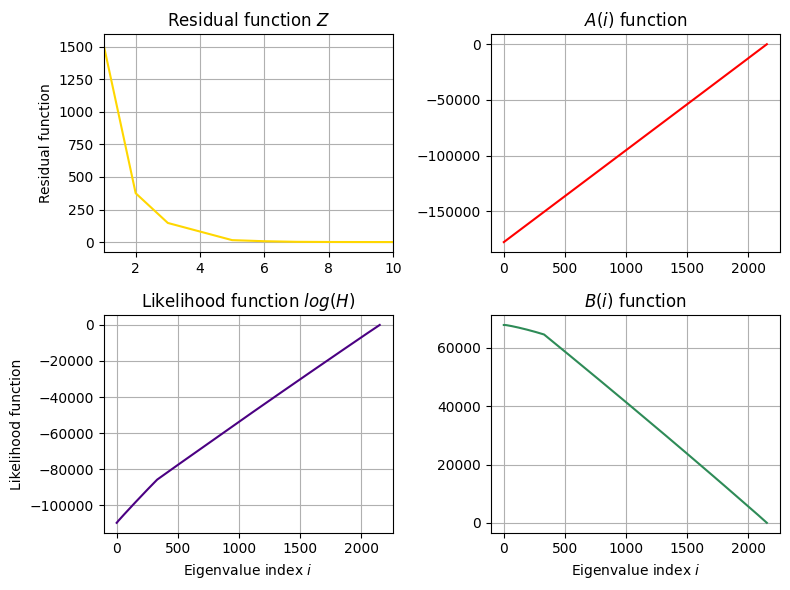

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].plot(x_axis, Z, color='gold')
axs[0, 0].grid()
axs[0, 0].set_xlim([1, 10])
axs[0, 0].set_ylabel('Residual function')
axs[0, 0].set_title("Residual function $Z$")

axs[0, 1].plot(x_axis, A, color='red')
axs[0, 1].grid()
# axs[0, 1].set_xlim([1, 10])
axs[0, 1].set_title("$A(i)$ function")

axs[1, 0].plot(x_axis, H, color='indigo')
axs[1, 0].grid()
# axs[1, 0].set_xlim([1, 10])
axs[1, 0].set_xlabel('Eigenvalue index $i$')
axs[1, 0].set_ylabel('Likelihood function')
axs[1, 0].set_title("Likelihood function $log(H)$")

axs[1, 1].plot(x_axis, B, color='seagreen')
axs[1, 1].grid()
# axs[1, 1].set_xlim([1, 10])
axs[1, 1].set_xlabel('Eigenvalue index $i$')
axs[1, 1].set_title("$B(i)$ function")


plt.tight_layout()
plt.show()

### 1.4 Endmembers $\hat{N_c}$ estimation

In [5]:
N_c = np.argmax(H)-1
print("The number of endmembers is : ",N_c)

The number of endmembers is :  535
